# Weather Exploratory Data Analysis (EDA)


## Overview

This project is an exploratory data analysis of weather data for the year 2012. The dataset contains various weather-related measurements recorded at different times throughout the year. You can get the dataset on this [link](https://www.kaggle.com/datasets/bhanupratapbiswas/weather-data)


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('Weather Data.csv')

In [65]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [66]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [67]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [68]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

## Data Cleansing

In [69]:
# Splitting the Date/Time column into different columns 
date = df['Date/Time'].apply(lambda x: x.split(' ')[0])
time = df['Date/Time'].apply(lambda x: x.split(' ')[1])
df.rename(columns={'Date': 'Old_Date'}, inplace=True)
df.rename(columns={'Time': 'Old_Time'}, inplace=True)
date_series = pd.Series(date, name='Date')
time_series = pd.Series(time, name='Time')
df.insert(0,'Date',date_series)
df.insert(1,'Time',time_series)

# Removing unnecessary columns
df.drop('Date/Time',axis=1,inplace=True)
df.drop('Dew Point Temp_C',axis=1,inplace=True)

# Converting dtypes
df['Date'] = pd.to_datetime(df['Date'])

In [70]:
df

,Date,Time,Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01,0:00,-1.8,86,4,8.0,101.24,Fog
1,2012-01-01,1:00,-1.8,87,4,8.0,101.24,Fog
2,2012-01-01,2:00,-1.8,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01,3:00,-1.5,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01,4:00,-1.5,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31,19:00,0.1,81,30,9.7,100.13,Snow
8780,2012-12-31,20:00,0.2,83,24,9.7,100.03,Snow
8781,2012-12-31,21:00,-0.5,93,28,4.8,99.95,Snow
8782,2012-12-31,22:00,-0.2,89,28,9.7,99.91,Snow


In [71]:
numeric_df = df[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']]

## Exploratory Data Analysis

The bar graph / histogram below shows the frequency in each range of data

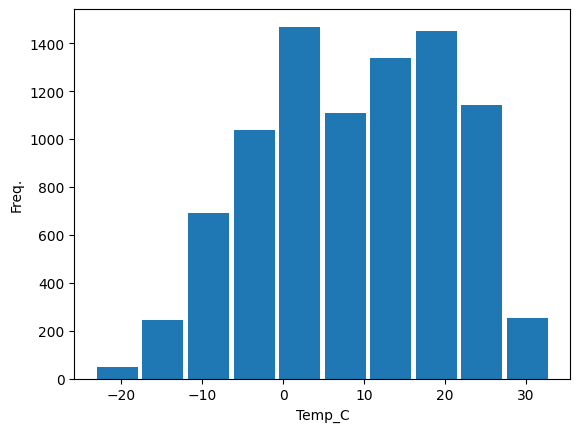

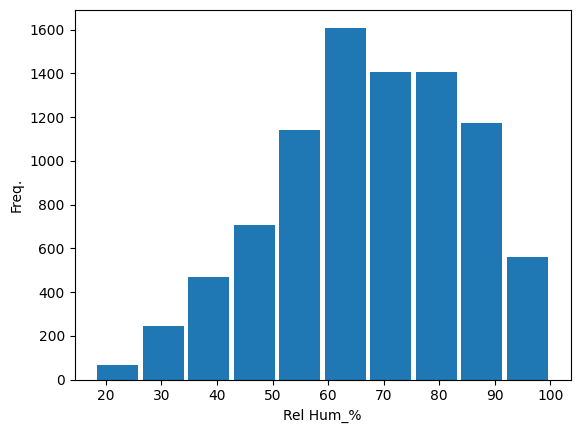

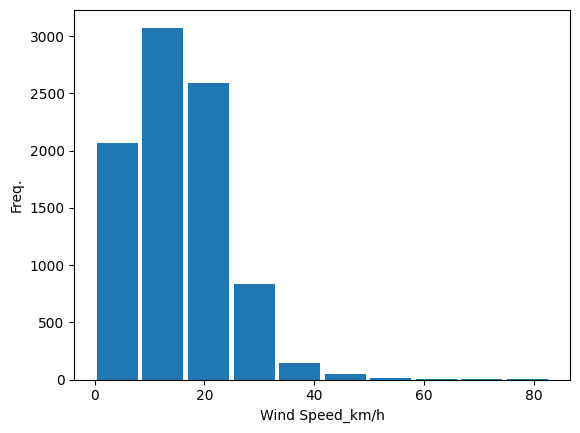

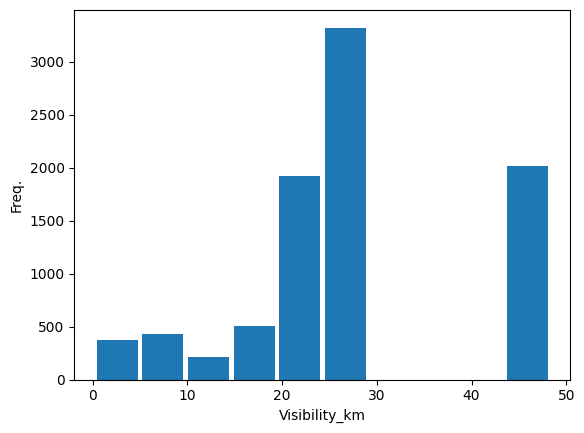

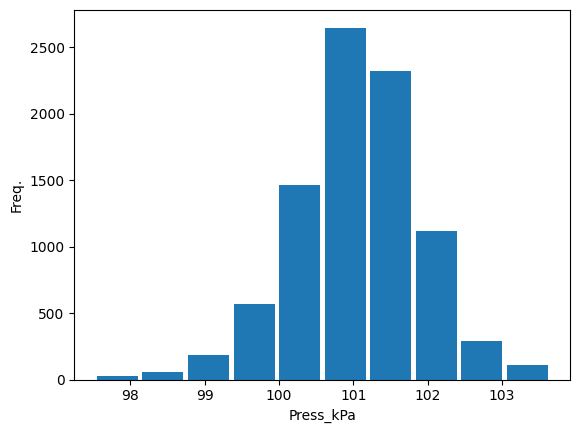

In [72]:
for i in numeric_df.columns:
    plt.hist(numeric_df[i],rwidth=0.9)
    plt.xlabel(i)
    plt.ylabel('Freq.')
    plt.show()

The boxplot below show us about the distribution of each feature (min. value, Q1, median, Q3, IQR (Q3-Q1), and max. value)

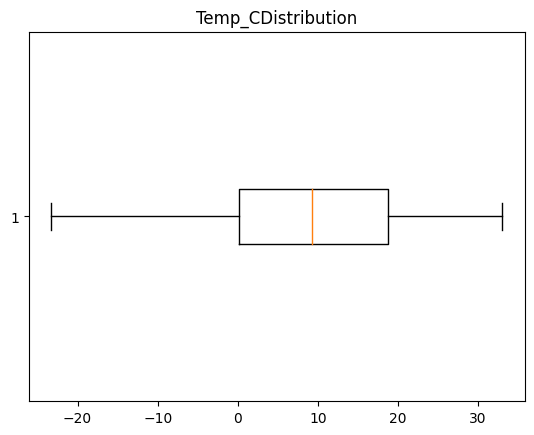

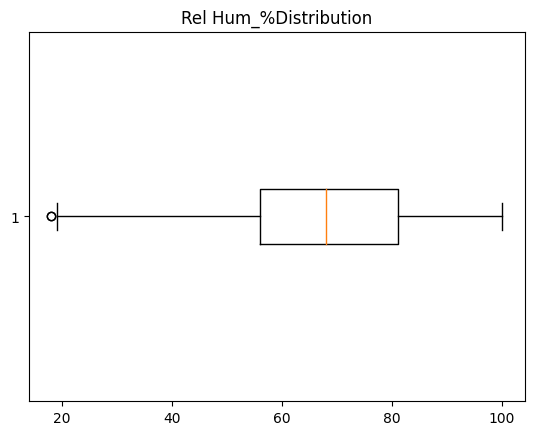

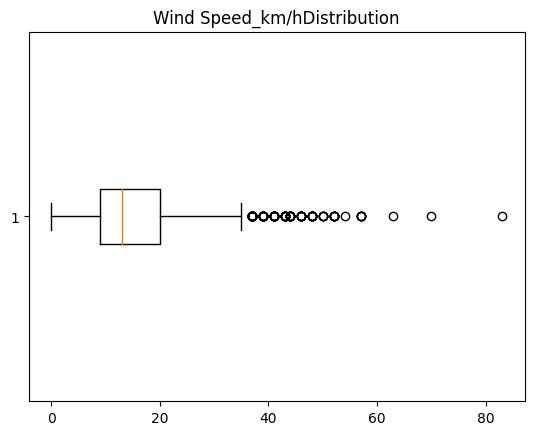

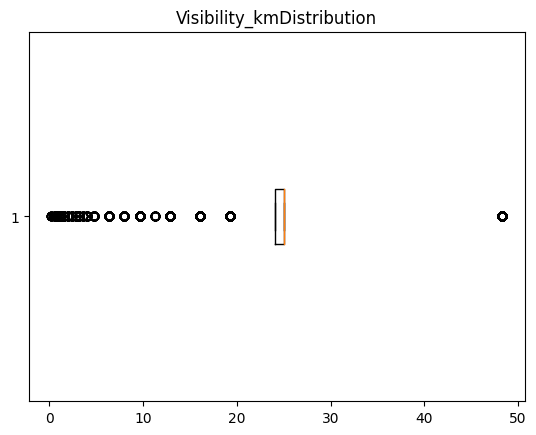

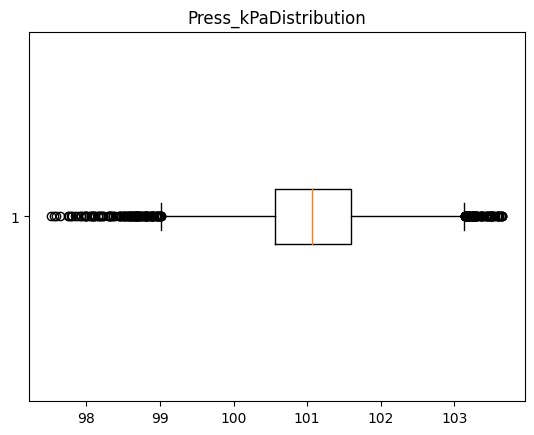

In [73]:
for i in numeric_df.columns:
    plt.boxplot(numeric_df[i], vert=False)
    plt.title(i + 'Distribution')
    plt.show()

The heatmap below show us the value of 'r' (correlation coefficient). The correlation coefficient 'r' ranges from -1 to 1. 
* -1 signifies a perfect negative correlation (one variable decreases proportionally as the other variable increases) 
* 1 indicates a perfect positive correlation, (both variables increase together in a linear manner)
* 0 implies no linear correlation (have no linear relationship).

<Axes: >

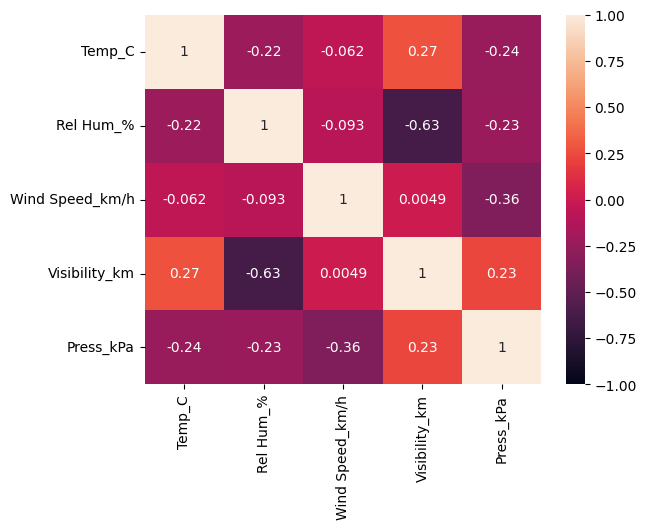

In [74]:
sns.heatmap(numeric_df.corr(),annot=True,vmax=1,vmin=-1)

The scatter plot below visualize the relationship between Visibility_km and other features. A scatter plot is used to visualize the relationship between two numerical variables. It displays individual data points on a two-dimensional plane, with one variable represented on the x-axis and the other variable represented on the y-axis.

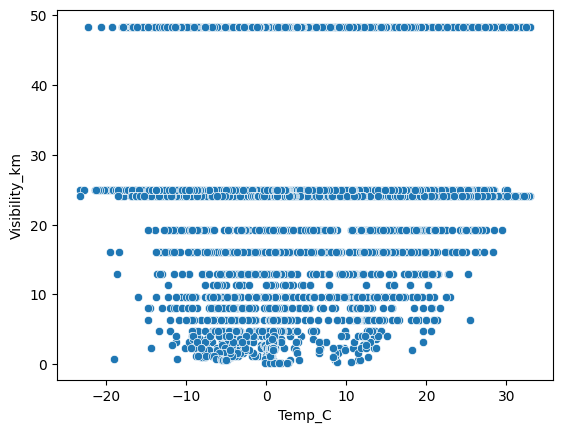

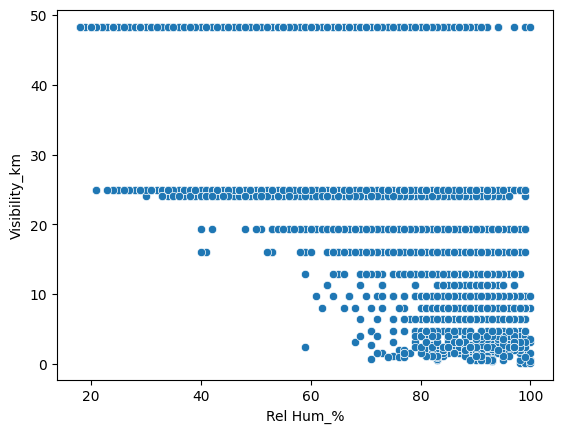

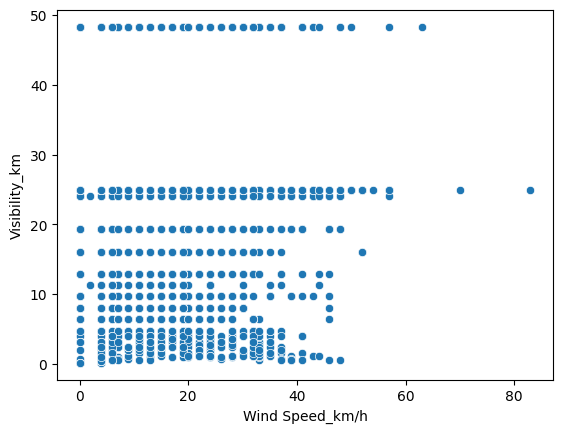

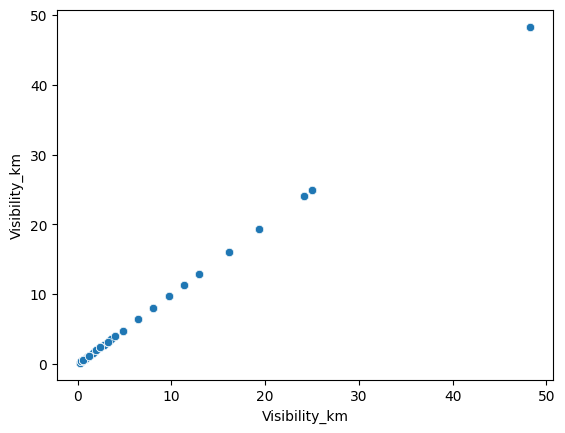

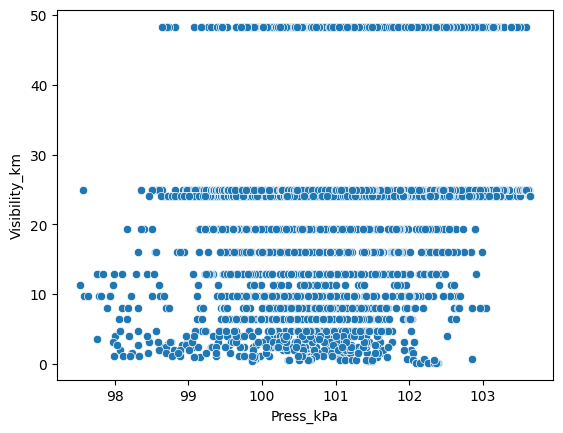

In [75]:
for i in numeric_df.columns:
    sns.scatterplot(data=numeric_df,x=i,y='Visibility_km')
    plt.show()

In [76]:
# Showing r-values
print('Visibility_km r-values:\n')
for i in numeric_df.columns:
    print(f'{i} -> r = {numeric_df.corr().Visibility_km[i]:.3f}')

Visibility_km r-values:

Temp_C -> r = 0.273
Rel Hum_% -> r = -0.634
Wind Speed_km/h -> r = 0.005
Visibility_km -> r = 1.000
Press_kPa -> r = 0.232
